# Data Retrieving

In [90]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML


from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier

df1=pd.read_csv("Data_Cortex_Nuclear (1).csv",encoding='ISO-8859-1')
print(df1.columns)


Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')


In [91]:
df = df1.drop(columns=['MouseID']) # droping ID columns


# Data Preparation

In [92]:
df.shape


(1080, 81)

In [93]:
display(HTML('<b>Table 1: Main Dataset</b>'))

df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [94]:
print(df.head(10))


   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   

   pCAMKII_N   pCREB_N    pELK_N   ...     pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936   ...    0.108336  0.427099   0.114783   
1   2.292150  0.226972  

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 81 columns):
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null float64
CAMKII_N           1077 non-null

In [96]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


## Extra whitespaces

In [97]:
#checking for extra white spaces in object type columns

print(df['Genotype'].value_counts())
print(df['Treatment'].value_counts())
print(df['Behavior'].value_counts())
print(df['class'].value_counts())


Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Memantine    570
Saline       510
Name: Treatment, dtype: int64
S/C    555
C/S    525
Name: Behavior, dtype: int64
c-SC-m    150
c-CS-m    150
t-SC-s    135
t-CS-m    135
c-CS-s    135
t-SC-m    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64


In [98]:
# Extra whitespaces
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    df[col] = df[col].str.strip()

In [99]:
for col in categoricalColumns:
    df[col] = df[col].str.replace('-', '_')
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c_CS_m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c_CS_m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c_CS_m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c_CS_m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c_CS_m


### Checking Missing Values

In [100]:
df.isnull().sum()

DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

All the missing values are in float , so we will impute them with mean

In [101]:
df.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [102]:
#Dropping and filling null values

df = df.fillna(df.mean()) #missing values imputing

In [103]:
df.isnull().sum() 

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
                  ..
RRP1_N             0
BAX_N              0
ARC_N              0
ERBB4_N            0
nNOS_N             0
Tau_N              0
GFAP_N             0
GluR3_N            0
GluR4_N            0
IL1B_N             0
P3525_N            0
pCASP9_N           0
PSD95_N            0
SNCA_N             0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SHH_N        

Other then 77 Values of proteins
79 Genotype: control (c) or trisomy (t)
80 Treatment type: memantine (m) or saline (s)
81 Behavior: context-shock (CS) or shock-context (SC)
82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

All columns are necessary so we won't be dropping any columns as all columns have some predictive power.

In [104]:
#Typos -from above we can visualize that only typo is in genotype column
print(df['Genotype'].value_counts())


Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


In [105]:
# df = df.mask(df['Genotype'] == 'Ts65Dn', other = 'Trisomy ')

df['Genotype'] = df['Genotype'].str.replace('Ts65Dn','Trisomy')

In [106]:
print(df['Genotype'].value_counts())


Control    570
Trisomy    510
Name: Genotype, dtype: int64


# Data Exploration


## Task 2.1 

### Class frequency Table

In [107]:
df['class'].unique()

array(['c_CS_m', 'c_SC_m', 'c_CS_s', 'c_SC_s', 't_CS_m', 't_SC_m',
       't_CS_s', 't_SC_s'], dtype=object)

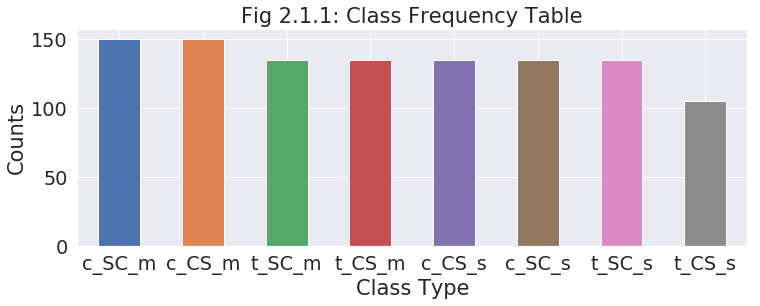

In [108]:
df['class'].value_counts().plot(kind='bar')
plt.title('Fig 2.1.1: Class Frequency Table')
plt.xlabel('Class Type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()

Text(0, 0.5, 'Counts')

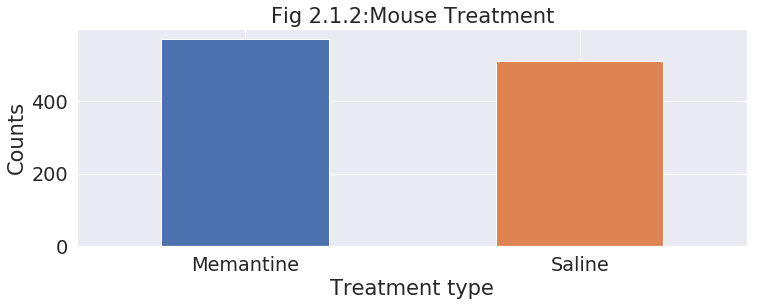

In [109]:
df['Treatment'].value_counts().plot(kind='bar')
plt.title('Fig 2.1.2:Mouse Treatment')
plt.xlabel('Treatment type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')




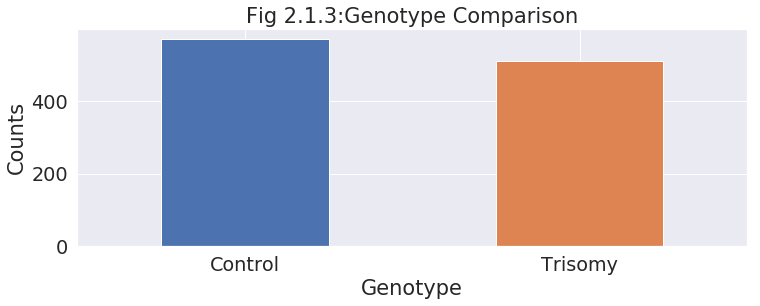

In [110]:
df['Genotype'].value_counts().plot(kind='bar')
plt.title('Fig 2.1.3:Genotype Comparison')
plt.xlabel('Genotype')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()



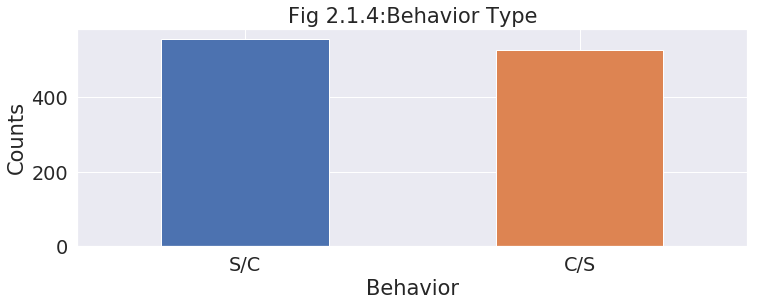

In [111]:
df['Behavior'].value_counts().plot(kind='bar')
plt.title('Fig 2.1.4:Behavior Type')
plt.xlabel('Behavior')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()



count    1080.000000
mean        0.425810
std         0.249015
min         0.145327
25%         0.288163
50%         0.366540
75%         0.487574
max         2.516367
Name: DYRK1A_N, dtype: float64


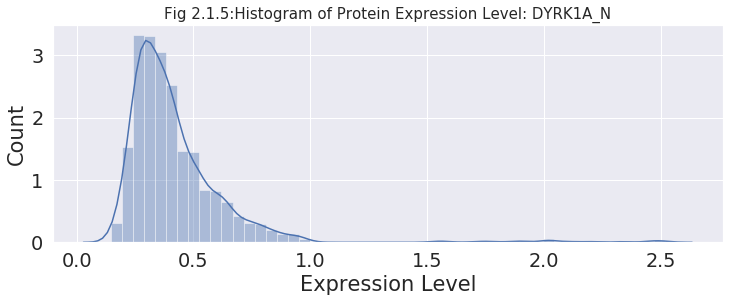

In [112]:
print(df['DYRK1A_N'].describe())
sns.distplot(df['DYRK1A_N'], kde = True).set_title('Fig 2.1.5:Histogram of Protein Expression Level: DYRK1A_N', fontsize = 15)
plt.xlabel('Expression Level')
plt.ylabel('Count')

plt.show()

count    1080.000000
mean        3.843934
std         0.931802
min         1.737540
25%         3.160287
50%         3.763306
75%         4.425107
max         8.482553
Name: NR2A_N, dtype: float64


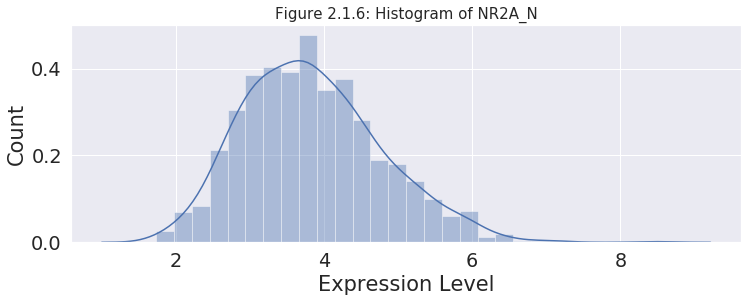

In [113]:
## NR2A_N
print(df['NR2A_N'].describe())
sns.distplot(df['NR2A_N'], kde = True).set_title('Figure 2.1.6: Histogram of NR2A_N', fontsize = 15)
plt.xlabel('Expression Level')
plt.ylabel('Count')

plt.show();

count    1080.000000
mean        0.212574
std         0.032542
min         0.112812
25%         0.190828
50%         0.210681
75%         0.234558
max         0.306247
Name: pCREB_N, dtype: float64


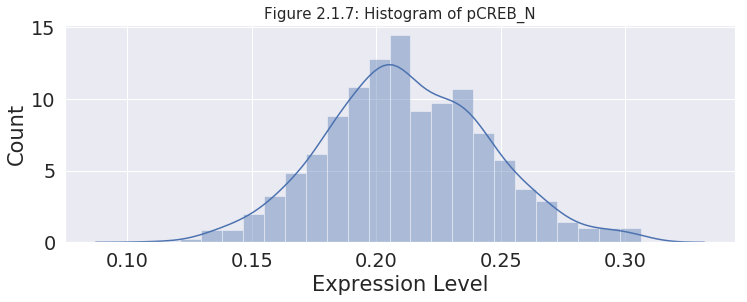

In [114]:
print(df['pCREB_N'].describe())
sns.distplot(df['pCREB_N'], kde = True).set_title('Figure 2.1.7: Histogram of pCREB_N', fontsize = 15)
plt.xlabel('Expression Level')
plt.ylabel('Count')

plt.show();

count    1080.000000
mean        0.180492
std         0.026334
min         0.113636
25%         0.161867
50%         0.179615
75%         0.195701
max         0.319558
Name: CREB_N, dtype: float64


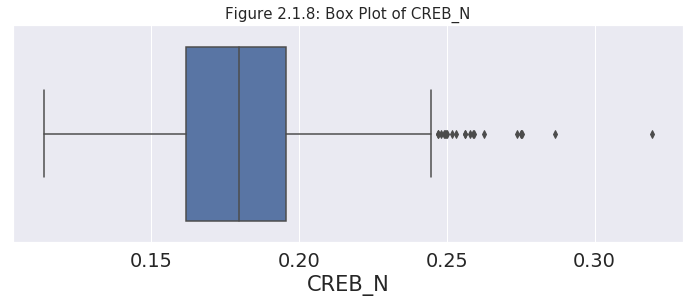

In [115]:
## CREB_N
print(df['CREB_N'].describe())
sns.boxplot(df['CREB_N']).set_title('Figure 2.1.8: Box Plot of CREB_N', fontsize = 15)
plt.show();

count    1080.000000
mean        0.156478
std         0.015071
min         0.100217
25%         0.146969
50%         0.156371
75%         0.165421
max         0.208698
Name: ERBB4_N, dtype: float64


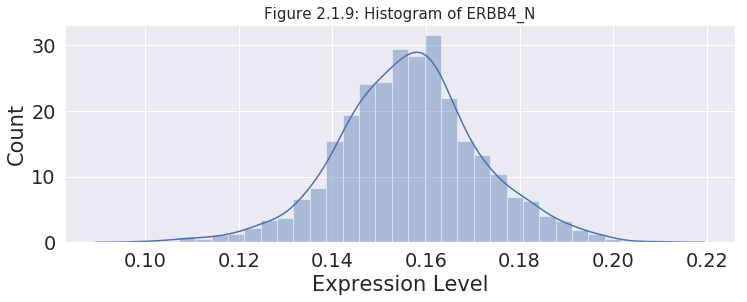

In [116]:
print(df['ERBB4_N'].describe())
sns.distplot(df['ERBB4_N'], kde = True).set_title('Figure 2.1.9: Histogram of ERBB4_N', fontsize = 15)
plt.xlabel('Expression Level')
plt.ylabel('Count')

plt.show();

count    1080.000000
mean        0.418605
std         0.067194
min         0.237777
25%         0.372059
50%         0.407430
75%         0.455938
max         0.722122
Name: TIAM1_N, dtype: float64


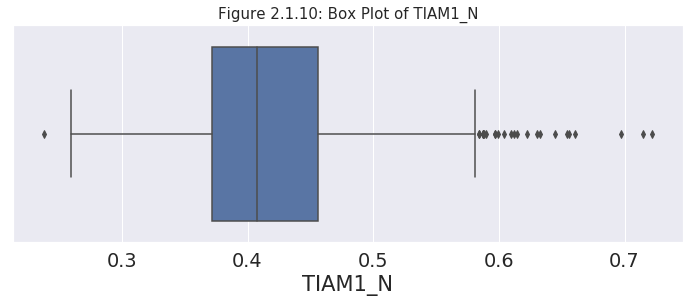

In [117]:
## TIAM1_N
print(df['TIAM1_N'].describe())
sns.boxplot(df['TIAM1_N']).set_title('Figure 2.1.10: Box Plot of TIAM1_N', fontsize = 15)
plt.show();

# TASK 2.2

In [118]:
#column wise exploration
class_labels = ['Genotype','Treatment','Behavior','class']
exp_df = pd.melt(df, id_vars = class_labels)

In [119]:
exp_mean = exp_df.groupby(by=['variable']).max().reset_index()

In [120]:
var_df = exp_mean.sort_values(by='value').variable

In [121]:
var_sub = np.array(var_df).reshape(11,7)

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

class PlotManager(object):
    def __init__(self):
        self.i = 1
    def save_last_plt(self):
        plt.savefig('Figure_{}.png'.format(self.i))
        self.i += 1

plt_manager = PlotManager()

In [123]:
def plot_expression_values():
    for (i, variable_subset) in enumerate(var_sub):
        data = exp_df.loc[exp_df.variable.isin(variable_subset)]

        sns.violinplot(x="variable", y="value", hue="variable", width=1, data=data, scale="area", orient="v")     

        sns.despine(left=True)
        plt_manager.save_last_plt()
        yield plt.show()



In [124]:
plot_df = plot_expression_values()

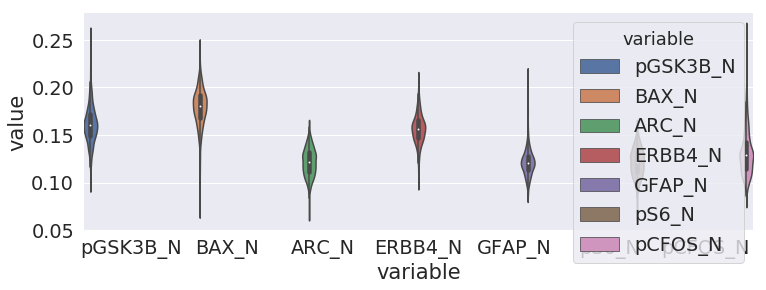

In [125]:
display(HTML('<b>Fig 2.2.1 : Expression value of different protein type</b>'))

next(plot_df)

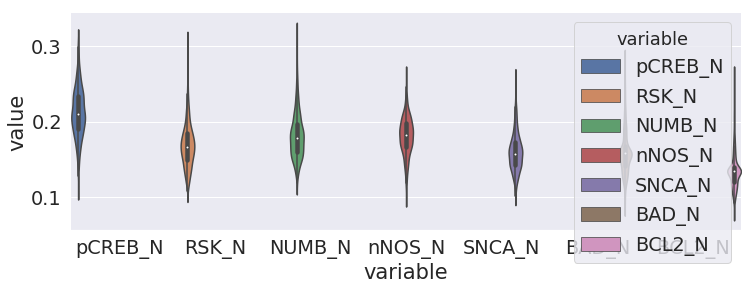

In [126]:
display(HTML('<b>Fig 2.2.2 : Expression value of different protein type</b>'))

next(plot_df)

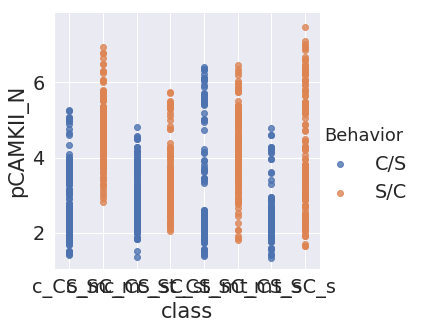

In [127]:
## pCAMKII_N
display(HTML('<b>Fig 2.2.3 : Plot between behavior and Protein pCAMKII_N</b>'))

sns.lmplot(x='class', y='pCAMKII_N', hue='Behavior',
           data=df,
           fit_reg = False)


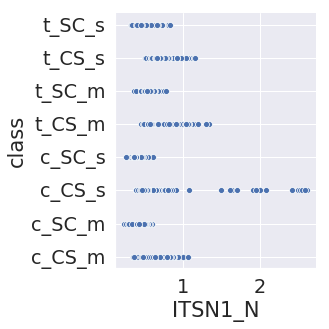

In [128]:
display(HTML('<b>Fig 2.2.4 : Plot between class and Protein ITSN1_N</b>'))

sns.relplot(x="ITSN1_N", y="class", data=df)

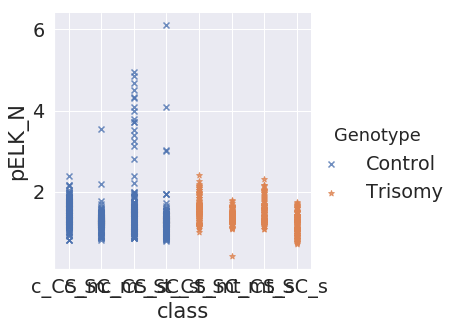

In [129]:
## 
display(HTML('<b>Fig 2.2.5 : Plot between genotype and Protein pELK_N</b>'))

sns.lmplot(x='class', y='pELK_N', markers=[ 'x', '*'], hue='Genotype',
           data=df,
           fit_reg=False
          )

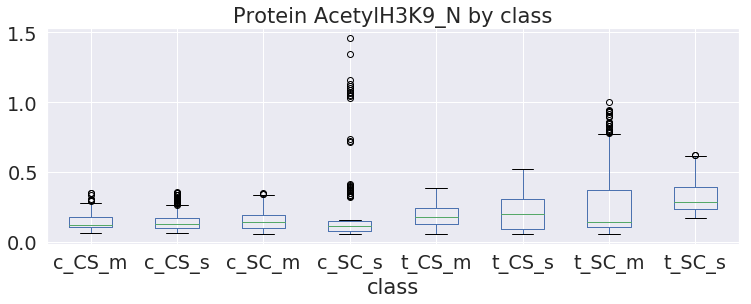

In [130]:
display(HTML('<b>Fig 2.2.6 : Plot between class and Protein AcetylH3K9_N</b>'))

df.boxplot(column='AcetylH3K9_N', by ='class')
plt.title('Protein AcetylH3K9_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

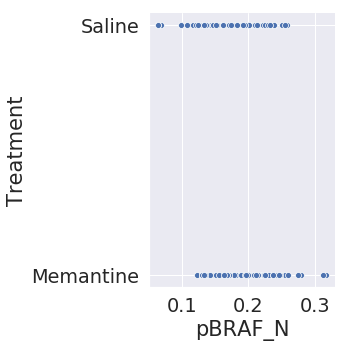

In [131]:
display(HTML('<b>Fig 2.2.7 : Plot between class and Protein pBRAF_N</b>'))

sns.relplot(x="pBRAF_N", y="Treatment", data=df)

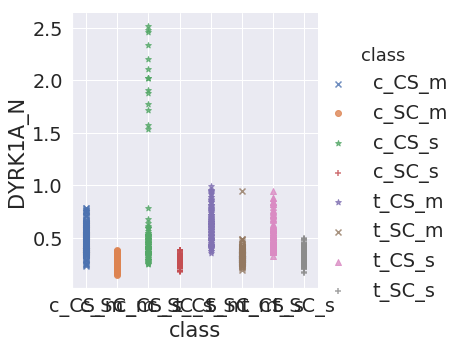

In [132]:
display(HTML('<b>Fig 2.2.8 : Plot between class and Protein DYRK1A_N</b>'))
sns.lmplot(x='class', y='DYRK1A_N', hue='class', 
           markers=['x', 'o','*','+','*','x','^','+'],
           fit_reg=False, data=df)

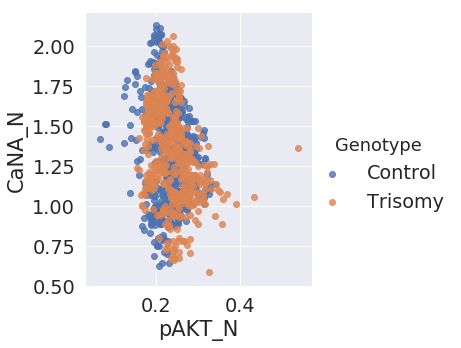

In [133]:
display(HTML('<b>Fig 2.2.9 : Plot between pAKT_N and CaNA_N using Genotype </b>'))
sns.lmplot(x='pAKT_N', y='CaNA_N', hue='Genotype',
           fit_reg=False, data=df)

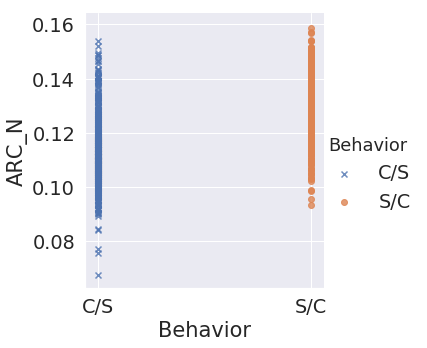

In [134]:
display(HTML('<b>Fig 2.2.10 : Plot between ARC_N and Behaviour </b>'))
sns.lmplot(x='Behavior', y='ARC_N', hue='Behavior', 
           markers=['x', 'o'],
           fit_reg=False, data=df)

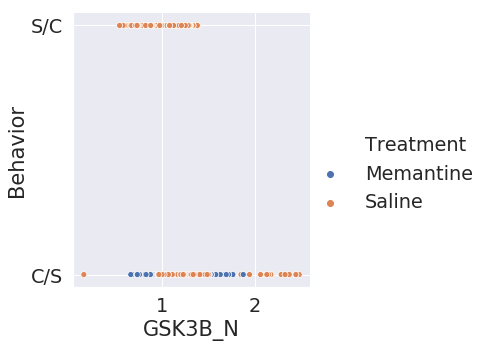

In [135]:
display(HTML('<b>Fig 2.2.11 : Plot between GSK3B_N and Behaviour by treatment </b>'))

sns.relplot(x="GSK3B_N", y="Behavior", data=df, hue = 'Treatment')

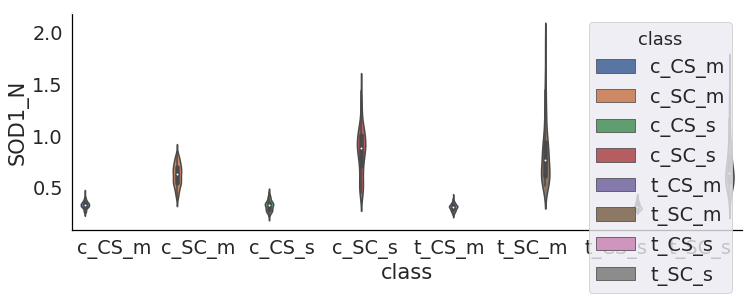

In [136]:
# Making violin plot to understand the distribution of protein
display(HTML('<b>Fig 2.2.12 : Plot between SOD1_N and class  </b>'))

sns.set(rc={'figure.figsize':(12,4)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='SOD1_N',
    x='class',
    data=df,
    hue = 'class'
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

## Predictive Modelling

### Encoding 

In [137]:
df['class'].unique()

array(['c_CS_m', 'c_SC_m', 'c_CS_s', 'c_SC_s', 't_CS_m', 't_SC_m',
       't_CS_s', 't_SC_s'], dtype=object)

In [138]:
#this is a catgorical target feature and need classification

In [139]:
df_part = df.drop(columns='class') # encoding targte feature
target = df['class']
target.value_counts()

c_SC_m    150
c_CS_m    150
t_SC_m    135
t_CS_m    135
c_CS_s    135
c_SC_s    135
t_SC_s    135
t_CS_s    105
Name: class, dtype: int64

## Encoding

In [140]:
# Encoding of target feature
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
target = labelencoder.fit_transform(target)
target


array([0, 0, 0, ..., 7, 7, 7])

## Scaling

In [141]:
data = df.iloc[: , 0:77]

In [142]:
from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler()

data_encoded_norm_numpy = data_scaler.fit_transform(data)

In [143]:
display(HTML('<b>Table 4: Scaling of data</b>'))

data_sc = pd.DataFrame(data_encoded_norm_numpy, 
                                    columns=data.columns)

data_sc.sample(n=5, random_state=11)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
361,0.791929,0.964706,0.814387,0.699996,0.607048,0.293261,0.458032,0.274196,0.628077,0.680837,...,0.227173,0.146546,0.133459,0.468422,0.123158,0.515207,0.224755,0.086917,0.332097,0.940596
746,0.050794,0.064856,0.471518,0.239894,0.144968,0.400482,0.532286,0.118143,0.415253,0.137325,...,0.321947,0.359346,0.299172,0.743330,0.431736,0.275344,0.224755,0.304119,0.898047,0.140085
733,0.052119,0.096896,0.492754,0.320530,0.214460,0.441679,0.555636,0.246995,0.601721,0.174024,...,0.247532,0.776146,0.299172,0.666547,0.374675,0.451017,0.224755,0.673067,0.332097,0.306122
508,0.038761,0.046376,0.378571,0.274779,0.121632,0.279585,0.419084,0.131124,0.385863,0.159878,...,0.755875,0.408013,0.316085,0.649583,0.611862,0.301331,0.166802,0.474941,0.330559,0.190447
476,0.083164,0.115991,0.527096,0.443810,0.268127,0.444164,0.617475,0.231481,0.636716,0.180666,...,0.842267,0.359346,0.299172,0.659948,0.553303,0.412825,0.214200,0.304119,0.332097,0.456433


# Feature Selection

In [144]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [145]:
new_Ind = []

In [146]:
cur_MaxScore = 0.0 

In [147]:
col_num = 77

In [148]:
col_Ind_Random = shuffle(range(0,col_num), random_state=999)

In [149]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data_encoded_norm_numpy[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,
    target, test_size=0.3, random_state=0)
    clf = KNeighborsClassifier(5, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
           new_Ind.remove(col_Ind_Random[cur_f])
    else:
           cur_MaxScore = cur_Score
           print("Score with " + str(len(new_Ind)) +
                                         " selectedfeatures:" + str(cur_Score))

Score with 1 selectedfeatures:0.16666666666666666
Score with 2 selectedfeatures:0.2222222222222222
Score with 3 selectedfeatures:0.404320987654321
Score with 4 selectedfeatures:0.5216049382716049
Score with 5 selectedfeatures:0.6820987654320988
Score with 6 selectedfeatures:0.7654320987654321
Score with 7 selectedfeatures:0.7777777777777778
Score with 8 selectedfeatures:0.8148148148148148
Score with 9 selectedfeatures:0.8179012345679012
Score with 10 selectedfeatures:0.8425925925925926
Score with 11 selectedfeatures:0.8919753086419753
Score with 12 selectedfeatures:0.9197530864197531
Score with 13 selectedfeatures:0.941358024691358
Score with 14 selectedfeatures:0.941358024691358
Score with 15 selectedfeatures:0.941358024691358
Score with 16 selectedfeatures:0.9475308641975309
Score with 17 selectedfeatures:0.9475308641975309
Score with 18 selectedfeatures:0.9537037037037037
Score with 19 selectedfeatures:0.9567901234567902
Score with 20 selectedfeatures:0.9567901234567902
Score with 2

In [150]:
 print("There are " + str(len(new_Ind)) + " features selected:")

There are 39 features selected:


In [151]:
print(new_Ind)

[2, 57, 42, 44, 58, 33, 34, 15, 22, 10, 65, 18, 30, 47, 63, 19, 68, 56, 40, 54, 75, 69, 24, 5, 49, 27, 46, 39, 70, 20, 55, 13, 4, 61, 37, 38, 62, 16, 51]


In [152]:
## Splitting into training and test set
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(newData, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

In [153]:
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(756, 40)
(324, 40)
(756,)
(324,)


In [154]:
## knn
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

grid_parm = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
            'metric':['euclidean','manhattan']}

g1 = GridSearchCV(KNeighborsClassifier(),grid_parm,n_jobs = -1)

g1_result = g1.fit(D_train,t_train)

In [155]:
print(g1_result.best_score_)
print(g1_result.best_estimator_)
print(g1_result.best_params_)

0.9775132275132276
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
{'metric': 'manhattan', 'n_neighbors': 1}


In [156]:
clf=KNeighborsClassifier(metric='manhattan', n_neighbors=1)
clf.fit(D_train,t_train)
predicted1 = clf.predict(D_test)
predicted1

array([4, 5, 5, 6, 1, 5, 4, 4, 3, 3, 3, 2, 4, 1, 3, 7, 7, 2, 1, 2, 6, 1,
       7, 0, 5, 2, 4, 5, 7, 5, 6, 4, 5, 6, 4, 0, 0, 3, 2, 2, 4, 6, 0, 1,
       0, 4, 7, 6, 6, 1, 4, 4, 4, 7, 2, 2, 1, 2, 3, 4, 7, 1, 1, 1, 3, 7,
       0, 0, 2, 7, 1, 0, 0, 2, 0, 3, 2, 7, 5, 6, 6, 3, 2, 7, 6, 6, 0, 0,
       2, 0, 1, 3, 7, 7, 2, 0, 0, 7, 6, 0, 1, 2, 6, 2, 3, 1, 2, 0, 4, 6,
       7, 6, 5, 4, 3, 7, 0, 0, 4, 0, 0, 7, 3, 5, 3, 4, 4, 0, 1, 0, 7, 2,
       0, 1, 2, 6, 5, 3, 4, 3, 4, 7, 1, 7, 0, 4, 1, 3, 3, 5, 6, 1, 3, 1,
       4, 0, 5, 4, 6, 6, 6, 0, 3, 1, 1, 4, 0, 1, 7, 6, 6, 1, 3, 3, 5, 1,
       4, 4, 0, 6, 6, 1, 2, 3, 1, 4, 1, 3, 5, 0, 6, 7, 3, 6, 5, 2, 1, 0,
       1, 7, 7, 5, 7, 5, 0, 6, 1, 5, 3, 0, 2, 7, 7, 2, 0, 6, 2, 7, 5, 5,
       0, 1, 3, 7, 4, 1, 4, 3, 2, 3, 7, 6, 6, 6, 1, 7, 0, 6, 4, 0, 3, 0,
       2, 2, 5, 6, 2, 6, 4, 0, 0, 5, 4, 3, 6, 6, 7, 0, 2, 7, 7, 0, 2, 1,
       6, 1, 0, 3, 7, 5, 0, 4, 2, 6, 5, 0, 2, 3, 3, 1, 0, 6, 7, 4, 4, 7,
       4, 1, 0, 3, 3, 0, 3, 1, 7, 3, 2, 7, 0, 4, 6,

In [157]:
print(predicted1.shape)

(324,)


In [158]:
results = pd.DataFrame(g1_result.cv_results_['params'])
results['test_score'] = g1_result.cv_results_['mean_test_score']
results

,metric,n_neighbors,test_score
0,euclidean,1,0.973545
1,euclidean,2,0.935185
2,euclidean,3,0.939153
3,euclidean,4,0.902116
4,euclidean,5,0.898148
5,euclidean,6,0.879630
6,euclidean,7,0.870370
7,euclidean,8,0.858466
8,euclidean,9,0.847884
9,euclidean,10,0.838624


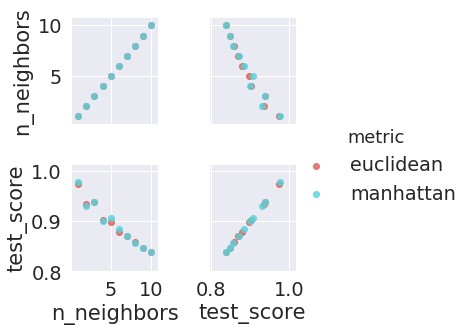

In [159]:
g = sns.PairGrid(results, vars=['n_neighbors','test_score'],
                 hue='metric', palette='hls')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [160]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(t_test,predicted1)
print(cm)


[[51  0  0  0  0  0  0  0]
 [ 1 43  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 42]]


In [161]:
from sklearn.metrics import classification_report
print(classification_report(t_test,predicted1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        44
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [162]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
grid_parm1 = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11],
            'criterion':['gini','entropy']}

g2 = GridSearchCV(DecisionTreeClassifier(),grid_parm1,n_jobs = -1)

g2_result = g2.fit(D_train,t_train)

In [163]:
print(g2_result.best_score_)
print(g2_result.best_estimator_)
print(g2_result.best_params_)


0.8148148148148148
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
{'criterion': 'gini', 'max_depth': 10}


In [164]:
clf1 = DecisionTreeClassifier(max_depth=10,criterion='gini')
clf1.fit(D_train, t_train)
predicted2 =  clf.predict(D_test)
predicted2


array([4, 5, 5, 6, 1, 5, 4, 4, 3, 3, 3, 2, 4, 1, 3, 7, 7, 2, 1, 2, 6, 1,
       7, 0, 5, 2, 4, 5, 7, 5, 6, 4, 5, 6, 4, 0, 0, 3, 2, 2, 4, 6, 0, 1,
       0, 4, 7, 6, 6, 1, 4, 4, 4, 7, 2, 2, 1, 2, 3, 4, 7, 1, 1, 1, 3, 7,
       0, 0, 2, 7, 1, 0, 0, 2, 0, 3, 2, 7, 5, 6, 6, 3, 2, 7, 6, 6, 0, 0,
       2, 0, 1, 3, 7, 7, 2, 0, 0, 7, 6, 0, 1, 2, 6, 2, 3, 1, 2, 0, 4, 6,
       7, 6, 5, 4, 3, 7, 0, 0, 4, 0, 0, 7, 3, 5, 3, 4, 4, 0, 1, 0, 7, 2,
       0, 1, 2, 6, 5, 3, 4, 3, 4, 7, 1, 7, 0, 4, 1, 3, 3, 5, 6, 1, 3, 1,
       4, 0, 5, 4, 6, 6, 6, 0, 3, 1, 1, 4, 0, 1, 7, 6, 6, 1, 3, 3, 5, 1,
       4, 4, 0, 6, 6, 1, 2, 3, 1, 4, 1, 3, 5, 0, 6, 7, 3, 6, 5, 2, 1, 0,
       1, 7, 7, 5, 7, 5, 0, 6, 1, 5, 3, 0, 2, 7, 7, 2, 0, 6, 2, 7, 5, 5,
       0, 1, 3, 7, 4, 1, 4, 3, 2, 3, 7, 6, 6, 6, 1, 7, 0, 6, 4, 0, 3, 0,
       2, 2, 5, 6, 2, 6, 4, 0, 0, 5, 4, 3, 6, 6, 7, 0, 2, 7, 7, 0, 2, 1,
       6, 1, 0, 3, 7, 5, 0, 4, 2, 6, 5, 0, 2, 3, 3, 1, 0, 6, 7, 4, 4, 7,
       4, 1, 0, 3, 3, 0, 3, 1, 7, 3, 2, 7, 0, 4, 6,

In [165]:
print(predicted2.shape)

(324,)


In [166]:
results1 = pd.DataFrame(g2_result.cv_results_['params'])
results1['test_score'] = g2_result.cv_results_['mean_test_score']
results1

,criterion,max_depth,test_score
0,gini,1,0.275132
1,gini,2,0.410053
2,gini,3,0.507937
3,gini,4,0.633598
4,gini,5,0.695767
5,gini,6,0.742063
6,gini,7,0.772487
7,gini,8,0.805556
8,gini,9,0.804233
9,gini,10,0.814815


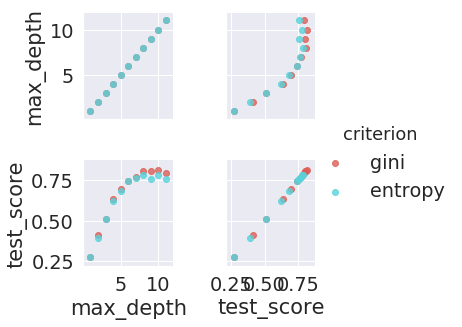

In [167]:
g1 = sns.PairGrid(results1, vars=['max_depth','test_score'],
                 hue='criterion', palette='hls')
g1.map(plt.scatter, alpha=0.8)
g1.add_legend();

In [168]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(t_test,predicted2)
print(cm1)

[[51  0  0  0  0  0  0  0]
 [ 1 43  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 42]]


In [169]:
from sklearn.metrics import classification_report
print(classification_report(t_test,predicted2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        44
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [170]:
#Further Fine tuning
clf2  = DecisionTreeClassifier(max_depth=15,criterion='entropy',min_samples_split=5 )
clf2.fit(D_train, t_train)
print(clf2.score(X_test, y_test))
predicted2 =  clf2.predict(D_test)
predicted2

0.9259259259259259


array([4, 5, 5, 6, 1, 5, 4, 5, 3, 3, 3, 2, 4, 1, 3, 7, 7, 2, 5, 2, 6, 1,
       7, 0, 5, 2, 4, 5, 7, 5, 6, 4, 5, 6, 4, 0, 0, 3, 2, 3, 4, 6, 0, 1,
       0, 4, 7, 6, 6, 6, 1, 4, 1, 7, 2, 2, 0, 2, 3, 1, 7, 0, 1, 1, 6, 7,
       0, 0, 2, 7, 1, 0, 1, 2, 0, 3, 2, 7, 5, 6, 6, 3, 2, 3, 6, 6, 6, 0,
       2, 0, 1, 6, 7, 7, 2, 0, 0, 7, 6, 1, 1, 2, 6, 2, 6, 1, 2, 0, 4, 6,
       7, 6, 5, 4, 3, 7, 0, 4, 4, 4, 0, 7, 3, 5, 6, 4, 1, 0, 1, 0, 7, 2,
       4, 1, 2, 6, 5, 3, 4, 3, 4, 7, 7, 7, 0, 4, 1, 3, 3, 4, 6, 1, 2, 5,
       0, 0, 5, 4, 2, 6, 6, 0, 3, 1, 1, 4, 0, 1, 7, 6, 6, 4, 3, 3, 5, 1,
       4, 4, 0, 6, 6, 1, 6, 3, 1, 4, 7, 3, 5, 0, 6, 7, 3, 6, 5, 3, 1, 0,
       1, 7, 6, 7, 7, 5, 1, 6, 1, 4, 3, 0, 2, 7, 7, 3, 0, 6, 2, 7, 5, 4,
       0, 0, 3, 7, 4, 1, 4, 3, 2, 3, 7, 6, 6, 6, 0, 7, 0, 6, 4, 5, 3, 0,
       3, 2, 5, 6, 2, 6, 4, 1, 1, 5, 4, 3, 6, 6, 3, 4, 3, 7, 7, 1, 2, 1,
       6, 1, 0, 3, 7, 5, 0, 0, 2, 6, 5, 0, 2, 3, 3, 1, 0, 6, 0, 0, 4, 7,
       4, 1, 0, 6, 3, 0, 3, 1, 7, 2, 2, 7, 0, 4, 6,

In [171]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(t_test,predicted2)
print(cm1)

[[51  0  0  0  0  0  0  0]
 [ 1 43  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 42]]


In [172]:
from sklearn.metrics import classification_report
print(classification_report(t_test,predicted2))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        51
           1       0.79      0.77      0.78        44
           2       0.91      0.83      0.87        35
           3       0.84      0.84      0.84        43
           4       0.80      0.80      0.80        40
           5       0.86      0.86      0.86        28
           6       0.82      0.98      0.89        41
           7       0.93      0.90      0.92        42

   micro avg       0.84      0.84      0.84       324
   macro avg       0.85      0.85      0.84       324
weighted avg       0.84      0.84      0.84       324



In [173]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=999)


In [174]:
for train_index, test_index in kf.split(data_encoded_norm_numpy):
    
    print( "TRAIN:", train_index, "TEST:", test_index)
    
    D_train, D_test = data_encoded_norm_numpy[train_index], data_encoded_norm_numpy[test_index]
    
    t_train, t_test = target[train_index], target[test_index]


TRAIN: [ 216  217  218  219  220  221  222  223  224  225  226  227  228  229
  230  231  232  233  234  235  236  237  238  239  240  241  242  243
  244  245  246  247  248  249  250  251  252  253  254  255  256  257
  258  259  260  261  262  263  264  265  266  267  268  269  270  271
  272  273  274  275  276  277  278  279  280  281  282  283  284  285
  286  287  288  289  290  291  292  293  294  295  296  297  298  299
  300  301  302  303  304  305  306  307  308  309  310  311  312  313
  314  315  316  317  318  319  320  321  322  323  324  325  326  327
  328  329  330  331  332  333  334  335  336  337  338  339  340  341
  342  343  344  345  346  347  348  349  350  351  352  353  354  355
  356  357  358  359  360  361  362  363  364  365  366  367  368  369
  370  371  372  373  374  375  376  377  378  379  380  381  382  383
  384  385  386  387  388  389  390  391  392  393  394  395  396  397
  398  399  400  401  402  403  404  405  406  407  408  409  410  411

In [175]:
for k, (train_index, test_index) in enumerate(kf.split(data_encoded_norm_numpy)):
 
    D_train, D_test = data_encoded_norm_numpy[train_index], data_encoded_norm_numpy[test_index]
    t_train, t_test = target[train_index], target[test_index]
 
    clf.fit(D_train, t_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(D_test, t_test)))


[fold 0] score: 0.20370
[fold 1] score: 0.11111
[fold 2] score: 0.10648
[fold 3] score: 0.07870
[fold 4] score: 0.01852


In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_ttest = StratifiedKFold(n_splits=15, random_state=999)

cv_KNN = cross_val_score(estimator=g1_result.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_ttest, 
                                 n_jobs=-3,
                                 scoring='roc_auc')
cv_KNN.mean()

0.9777777777777779

In [177]:
cv_DT = cross_val_score(estimator=g2_result.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_ttest, 
                                n_jobs=-3,
                                scoring='roc_auc')
cv_DT.mean()


0.9688888888888888

In [178]:
## Comparison 
from scipy import stats
print(stats.ttest_rel(cv_DT, cv_KNN))

Ttest_relResult(statistic=-0.2699430046592733, pvalue=0.7911424150833273)
